# Figure 2: promiscuity

In [36]:
import pandas as pd
import csv
import os
import collections
import stylia
import matplotlib.pyplot as plt
import numpy as np
from stylia import NamedColors

pid2name = {}
with open("../data/pid2name_primary.tsv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for r in reader:
        pid2name[r[0]] = r[1]

PAPER_WIDTH = 7.08661

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

fragment_counts = collections.defaultdict(int)
for r in list(df["fragId"]):
    fragment_counts[r] += 1

fragment_counts = sorted(fragment_counts.items(), key=lambda x: -x[1])

y = [x[1] for x in fragment_counts] + [0]
x = [i for i in range(len(fragment_counts))] + [403]

fig, ax = plt.subplots(1,1, figsize=(1.5, 1.4))

ax = stylia.figure.figure.stylize(ax)

ax.plot(x, y, lw=1, color=NamedColors().purple)
ax.fill_betweenx(y, x, color=NamedColors().purple, alpha=0.5)
yticks = [0, 100, 200, 300, 400, 500]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, va="center",  ha="right", fontsize=6)
xticks = [0, 100, 200, 300, 400]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, va="top",  ha="center", fontsize=6, rotation=45)

fids = [x[0] for x in fragment_counts]
y = y[:-1]
x = x[:-1]

focus_fragments = ["C388", "C246", "C348", "C238", "C177", "C258", "C327"]

for i,fid in enumerate(fids):
    if fid in focus_fragments:
        ax.text(x[i], y[i], fid, fontsize=6)
        ax.scatter([x[i]], [y[i]], color="white", lw=0.5, edgecolor=NamedColors().purple, s=20, zorder=1000)

ax.set_ylabel("Proteins", fontsize=6)
ax.set_xlabel("Ranked fragments", fontsize=6)
ax.set_xlim(-20, 420)
ax.set_title("", fontsize=6)
#plt.fill_betweenx(np.array(x)*2, y)

plt.tight_layout()
plt.savefig("../assets/Figure02_A.png", dpi=600)
plt.savefig("../assets/Figure02_A.pdf")

NameError: name 'np' is not defined

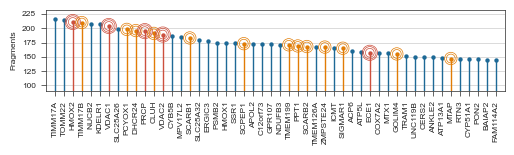

In [48]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

protein_counts = collections.defaultdict(int)
for r in list(df["accession"]):
    if r not in pid2name:
        gn = r
    else:
        gn = pid2name[r]
    protein_counts[gn] += 1

protein_counts = sorted(protein_counts.items(), key=lambda x: -x[1])[:50]

fig, ax = plt.subplots(1,1, figsize=(PAPER_WIDTH/1.39, 1.5))
ax = stylia.figure.figure.stylize(ax)

lb = pd.read_csv("../data/binddegs_frequent_hitters.csv", sep=";")

labelling_bias = list(lb[lb["kleiner"].notnull()]["gene_name"])
labelling_bias_soft = set(list(lb[lb["west"].notnull()]["gene_name"])).difference(labelling_bias)

for i, p in enumerate(protein_counts):
    l = p[0]
    if l in labelling_bias:
        color = NamedColors().red
        ax.scatter([i, i], [0, p[1]], s=40, color="none", edgecolor=color, lw=0.5, zorder=1000)
        ax.scatter([i, i], [0, p[1]], s=80, color="none", edgecolor=color, lw=0.5, zorder=1000)
        ax.scatter([i, i], [0, p[1]], s=120, color="none", edgecolor=color, lw=0.5, zorder=1000)
    elif l in labelling_bias_soft:
        color = NamedColors().orange
        ax.scatter([i, i], [0, p[1]], s=40, color="none", edgecolor=color, lw=0.5, zorder=1000)   
        ax.scatter([i, i], [0, p[1]], s=80, color="none", edgecolor=color, lw=0.5, zorder=1000)  
    else:
        color = NamedColors().blue
    ax.scatter([i], [p[1]], s=10, color=color, lw=0)
    ax.plot([i, i], [0, p[1]], color=color, lw=1)

ax.set_ylim(90, 232)

ax.set_xticks([i for i in range(len(protein_counts))])
ax.set_xticklabels([p[0] for p in protein_counts], fontsize=6, rotation=90, va="top", ha="center")

ax.set_yticks([100, 125, 150, 175, 200, 225])
ax.set_yticklabels([100, 125, 150, 175, 200, 225], fontsize=6)

ax.set_ylabel("Fragments", fontsize=6)
ax.set_xlabel("")
ax.set_title("")
ax.xaxis.grid()

ax.set_xlim(-1, 50)

plt.tight_layout()
plt.savefig("../assets/Figure02_C.png", dpi=600, bbox_inches="tight")
plt.savefig("../assets/Figure02_C.pdf", bbox_inches="tight")

In [40]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

enriched_proteome = set(df["accession"])

protein_counts = collections.defaultdict(int)
for r in list(df["accession"]):
    protein_counts[r] += 1

protein_counts = sorted(protein_counts.items(), key=lambda x: -x[1])[:]

top_prots = set([p[0] for p in protein_counts])
n = len(enriched_proteome)

sl = pd.read_csv("../data/subcellular_location.tsv", sep="\t")

human_proteome = pd.read_csv("../data/human_proteome_with_gene_names.tab", sep="\t")
name2pid = {}
for r in human_proteome[["Entry", "Gene names"]].values:
    if str(r[1]) == "nan": continue
    for x in r[1].split(" "):
        for y in x.split(";"):
            name2pid[y] = r[0]

proteins = []
c = 0
for gn in sl["Gene name"].tolist():
    if gn in name2pid:
        proteins += [name2pid[gn]]
    else:
        x = gn.split("-")
        if len(x) == 2:
            if len(x[1]) >= 3:
                prots = []
                if x[0] in name2pid:
                    prots += [name2pid[x[0]]]
                if x[1] in name2pid:
                    prots += [name2pid[x[1]]]
                if len(prots) > 0:
                    p = ";".join(prots)
                    proteins += [p]
                    continue
        proteins += [None]
        c += 1

sl["UniProtID"] = proteins
sl = sl[sl["UniProtID"].notnull()]

reliabilities = ['Approved', 'Enhanced', 'Supported', 'Uncertain']
sl_ = sl[sl["Reliability"].isin(reliabilities[:3])]

pid2loc = collections.defaultdict(list)
for r in sl_[["UniProtID", "Main location"]].values:
    if r[0] not in enriched_proteome:
        continue
    x = r[1].split(";")
    pid2loc[r[0]] += x

all_counts = collections.defaultdict(int)
top_counts = collections.defaultdict(int)

for k,v in pid2loc.items():
    for x in v:
        all_counts[x] += 1
        if k in top_prots:
            top_counts[x] += 1

high_level_loc = {

"Cytoplasm": [
    "Actin filaments",
    "Aggregosome",
    "Centriolar satellite",
    "Centrosome",
    "Cleavage furrow",
    "Cytokinetic bridge",
    "Cytoplasmic bodies",
    "Cytosol",
    "Focal adhesion sites",
    "Intermediate filaments",
    "Microtubule ends",
    "Microtubules",
    "Midbody",
    "Midbody ring",
    "Mitotic spindle",
    "Rods & Rings"
],

"Mitochondria": [
    "Mitochondria"
],

"Nucleous": [
    "Kinetochore",
    "Mitotic chromosome",
    "Nuclear bodies",
    "Nuclear speckles",
    "Nucleoli",
    "Nucleoli fibrillar center",
    "Nucleoli rim",
    "Nucleoplasm"
],

"Endomembrane": [
    "Nuclear membrane",
    "Cell Junctions",
    "Endoplasmic reticulum",
    "Endosomes",
    "Golgi apparatus",
    "Lipid droplets",
    "Lysosomes",
    "Peroxisomes",
    "Plasma membrane",
    "Vesicles"
]
}

In [41]:
df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]
df = db

pid2name = {}
with open("../data/pid2name_primary.tsv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for r in reader:
        pid2name[r[0]] = r[1]

protein_counts = collections.defaultdict(int)
for r in list(df["accession"]):
    protein_counts[r] += 1

In [42]:
x = []
y = []
z = []

high_level_loc_inv = dict((x, k) for k,v in high_level_loc.items() for x in v)
for k,v in pid2loc.items():
    for w in v:
        x += [k]
        y += [w]
        z += [high_level_loc_inv[w]]

dp = pd.DataFrame({"uniprot_ac": x, "loc": y, "hloc": z})

counts = []
for p in dp["uniprot_ac"].tolist():
    counts += [protein_counts[p]]

dp["counts"] = counts

selected = dp[dp["counts"] >= 50].value_counts("loc").index.tolist()[:8]

mloc = []
for r in dp[["loc", "hloc"]].values:
    loc, hloc = r[0], r[1]
    if loc in selected:
        mloc += [loc]
    else:
        mloc += [hloc + " (other)"]

dp["mloc"] = mloc

In [44]:
labels = [
    "Endoplasmic reticulum", "Golgi apparatus", 'Nuclear membrane', 'Plasma membrane', 'Vesicles', 'Endomembrane (other)',
    'Cytosol', 'Mitochondria', 'Cytoplasm (other)',
    'Nucleoplasm', 'Nucleous (other)'
]

from scipy.stats import fisher_exact

def enrichment(cutoff, col="hloc"):
    locs = list(set(dp[col]))
    dr = collections.defaultdict(list)
    for l in locs:
        all_prots = set(dp["uniprot_ac"])
        cut_prots = set(dp[dp["counts"] >= cutoff]["uniprot_ac"])
        cat_prots = set(dp[dp[col] == l]["uniprot_ac"])
        a = len(cut_prots.intersection(cat_prots))
        b = len(cut_prots) - a
        c = len(cat_prots) - a
        d = len(all_prots) - (a+b+b)
        C = [[a,b],[c,d]]
        o, p = fisher_exact(C, alternative="greater")
        res = {
            "term": l,
            "cutoff": cutoff,
            "is_both": a,
            "is_term": len(cat_prots),
            "is_prom": len(cut_prots),
            "odds_ratio": o,
            "p_value": p
        }
        for k,v in res.items():
            dr[k] += [v]
    dr = pd.DataFrame(dr).sort_values("p_value")
    return dr

3.470130733053102e-20
3.470130733053102e-20
6.625022869570331e-05


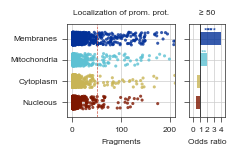

In [45]:
from stylia import ContinuousColorMap, NamedColors, ONE_COLUMN_WIDTH
import stylia
import numpy as np
from matplotlib.patches import Rectangle

fig, axs = stylia.create_figure(1,2, width = ONE_COLUMN_WIDTH/1.5, height = ONE_COLUMN_WIDTH/2.3, width_ratios=(3,1))
ax = axs.next()

ax.set_ylim(-0.7, 3.7)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["Nucleous", "Cytoplasm", "Mitochondria", "Membranes"])
#ax.set_yticklabels([])
#ax.axes.yaxis.set_visible(False)
ax.set_xlim(-10, 210)

noise = np.random.uniform(low=-0.3, high=0.3, size=dp.shape[0])
x = []
for hloc in dp["hloc"].tolist():
    if hloc == "Endomembrane":
        x += [3]
        continue
    if hloc == "Mitochondria":
        x += [2]
        continue
    if hloc == "Cytoplasm":
        x += [1]
        continue
    if hloc == "Nucleous":
        x += [0]
        continue

term2idx = {
    "Endomembrane": 3,
    "Mitochondria": 2,
    "Cytoplasm": 1,
    "Nucleous": 0
}

x_ = []
for i, n in enumerate(noise):
    x_ += [x[i] + n]

y = dp["counts"].tolist()

ax.axvline(x=50, color=NamedColors().red, linestyle="--")

cmap = ContinuousColorMap("spectral", transformation="uniform")
cmap.fit([i for i in range(4)])
colors = cmap.transform(x)

ax.scatter(y, x_, s=5, color=colors, alpha=0.8, lw=0)

stylia.label(ax, xlabel="Fragments", title="Localization of prom. prot.")

ax = axs.next()

cutoff = 50
dr = enrichment(50)
colors = cmap.transform([i for i in range(4)])
for r in dr[["term", "odds_ratio", "p_value"]].values:
    t = r[0]
    o = r[1]
    p = r[2]
    idx = term2idx[t]
    r = Rectangle(xy=(1, idx-0.3), width=o-1, height=0.6, color=colors[idx], lw=0, alpha=0.8)
    ax.add_patch(r)
    if p < 1e-15:
        ax.text(1+(o-1)/2, idx+0.35, "****", color=colors[idx], va="center", ha="center", fontsize=6)
        print(p)
    if p < 1e-3:
        ax.text(1+(o-1)/2, idx+0.35, "**", color=colors[idx], va="center", ha="center", fontsize=6)
        print(p)

ax.axvline(x=1, lw=0.5, color="black")

ax.set_ylim(-0.7, 3.7)
ax.set_yticks([0, 1, 2, 3])
#ax.set_yticklabels([])
#ax.axes.yaxis.set_visible(False)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlim(-0.5, 4.5)

ax.set_yticklabels("")
stylia.label(ax, title="≥ 50", xlabel="Odds ratio", ylabel="")

stylia.save_figure("../assets/Figure02_D.png")
stylia.save_figure("../assets/Figure02_D.pdf")

In [37]:
def read_annotations(file_name):
    fn = os.path.join("../data/{0}.tsv".format(file_name))
    R = []
    with open(fn, "r") as f:
        reader = csv.reader(f, delimiter="\t")
        for r in reader:
            R += [[r[0], r[1]]]
    return R

anns = read_annotations("pharos_dto")
pid2ann = collections.defaultdict(list)
for r in anns:
    pid2ann[r[0]] += [r[1]]

ann2pid = collections.defaultdict(list)
for pid in list(human_proteome):
    if pid not in pid2ann:
        ann2pid["Unknown"] += [pid]
    else:
        for x in pid2ann[pid]:
            ann2pid[x] += [pid]

ann2pid = dict((k, set(v)) for k,v in ann2pid.items())

ann2pid_sorted = sorted(ann2pid.items(), key = lambda x: -len(x[1]))

keeps = sorted([x[0] for x in ann2pid_sorted[:50]], key = lambda x: x.lower())

## Predictions figure

In [2]:
import joblib
import miniautoml
import os
import stylia
import numpy as np
from stylia import NamedColors

results_folder = "/Users/mduranfrigola/Documents/GitHub/mini-automl/results"

def roc_plot(ax, model_name, color):
    x = np.arange(0,1.01,0.01)
    results = joblib.load(os.path.join(results_folder, "{0}.joblib".format(model_name))).validation_metrics
    n_splits = results["n_splits"]
    ys = []
    for i in range(n_splits):
        fpr = results["fprs"][i]
        tpr = results["tprs"][i]
        ys += [np.interp(x, fpr, tpr)]
    ys = np.array(ys)
    y_mean = np.array([0] + list(np.mean(ys, axis=0)))
    y_std = np.array([0] + list(np.std(ys, axis=0)))
    x = np.array([0] + list(x))
    ax.plot(x, y_mean, zorder=1000, color=color, lw=1)
    ax.fill_between(x, np.clip(y_mean+y_std, 0,1), np.clip(y_mean-y_std, 0,1), color=color, alpha=0.3, lw=0)
    ax.plot([0,1], [0,1], lw=0.5, color="lightgray")
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    n = results["positives"]
    roc_mean = np.mean(results["aucs"])
    roc_std = np.std(results["aucs"])

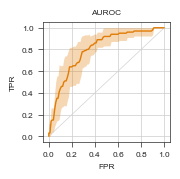

In [3]:
fig, axs = stylia.create_figure(1,1, 1.75, 1.75)
ax = axs.next()

tasks = ["promiscuity_fxp0_pxf0",
         "promiscuity_fxp0_pxf1",
         "promiscuity_fxp0_pxf2",
         "promiscuity_fxp1_pxf0",
         "promiscuity_fxp1_pxf1",
         "promiscuity_fxp1_pxf2",
         "promiscuity_fxp2_pxf0",
         "promiscuity_fxp2_pxf1",
         "promiscuity_fxp2_pxf2"]

tasks = ["promiscuity_pxf1"]

for t in tasks:
    if "pxf0" in t:
        color = NamedColors().red
    if "pxf1" in t:
        color = NamedColors().orange
    if "pxf2" in t:
        color = NamedColors().blue
    roc_plot(ax, t, color)

stylia.label(ax, title="AUROC", xlabel="FPR", ylabel="TPR")
stylia.save_figure("../assets/Figure02_F.png")
stylia.save_figure("../assets/Figure02_F.pdf")

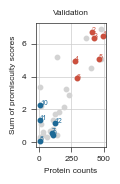

In [7]:
import pandas as pd
import collections
import numpy as np
import os
import stylia
from stylia import TWO_COLUMNS_WIDTH
from stylia import NamedColors

sel_fids = ["V0049", "V0157", "V0081", "V0480", "V0302", "V0053", "V4856", "V0005", "V5335", "V5151", "V0019", "V0022"]

df = pd.read_csv("../data/enamine_stock_miniautoml_predictions.tsv", sep="\t")
cols = ["catalog_id", "fid", "original_validation", "smiles"] + [x for x in list(df.columns) if x.startswith("promiscuity")]
df = df[cols]

frag_ids = []
for fid in df["fid"].tolist():
    if str(fid) == "nan":
        frag_ids += [np.nan]
    else:
        frag_id = fid.split("-")[1]
        if len(frag_id) == 5:
            frag_ids += [frag_id]
        else:
            if frag_id == "V059":
                frag_id = "V0081"
            elif frag_id == "V060":
                frag_id = "V0157"
            elif frag_id == "V062":
                frag_id = "V0302"
            elif frag_id == "V065":
                frag_id = "V0480"
            else:
                frag_id = frag_id.replace("V", "V0")
            frag_ids += [frag_id]
df["FragID"] = frag_ids

dv = pd.read_csv("../data/validation.tsv", sep="\t")
dv = dv[dv["Number_of_Protein_Unique_Peptides"] >= 2]
dv = dv[dv["Abundance_Ratio_PValue"] < 0.05]
dv = dv[dv["Abundance_Ratio_Adj_PValue"] < 0.25]
dv = dv[dv["Abundance_Ratio_log2"] > 2.3]
dv = dv[dv["Abundance_Ratio_log2_median_corr"] > 1]
dv = dv[dv["Rank_relative"] < 500]

fragment_counts = collections.defaultdict(int)
for r in dv["FragID"].tolist():
    fragment_counts[r] += 1

P = np.sum(np.array(df[cols[4:]]), axis=1)
df["sum"] = P

pred = {}
for v in df[df["FragID"].notnull()][["FragID", "sum"]].values:
    pred[v[0]] = v[1]

x = []
y = []
for k,v in fragment_counts.items():
    if k in pred:
        x += [v]
        y += [pred[k]]



fig, axs = stylia.create_figure(1,1, height=TWO_COLUMNS_WIDTH/4*1.01, width=TWO_COLUMNS_WIDTH/6.2*1.01)
ax = axs.next()

ax.scatter(x,y, color=NamedColors().gray)

x = []
y = []
for s in sel_fids[:6]:
    x += [fragment_counts[s]]
    y += [pred[s]]
ax.scatter(x, y, color=NamedColors().red)
l = 0
for x_, y_ in zip(x, y):
    l += 1
    ax.text(x_, y_, l, color=NamedColors().red)

x = []
y = []
for s in sel_fids[6:]:
    x += [fragment_counts[s]]
    y += [pred[s]]
ax.scatter(x, y, color=NamedColors().blue)
for x_, y_ in zip(x, y):
    l += 1
    ax.text(x_, y_, l, color=NamedColors().blue)

ax.set_xticks([0, 250, 500])

stylia.label(ax=ax, title="Validation", xlabel="Protein counts", ylabel="Sum of promiscuity scores")
stylia.save_figure("../assets/Figure02_I.png")
stylia.save_figure("../assets/Figure02_I.pdf")

In [8]:
import joblib
import os
import numpy as np
import pandas as pd

mini_xai_results_path = "/Users/mduranfrigola/Documents/GitHub/mini-xai/results"

dex = joblib.load(os.path.join(mini_xai_results_path, "dex.joblib"))
grid_names = joblib.load(os.path.join(mini_xai_results_path, "grid_names.joblib"))
name_grid = joblib.load(os.path.join(mini_xai_results_path, "name_grid.joblib"))
shap_te = joblib.load(os.path.join(mini_xai_results_path, "shap_te.joblib"))
X, S = joblib.load(os.path.join(mini_xai_results_path, "ex_matrices.joblib"))
smi_ex, yex, y_pred_ex = joblib.load(os.path.join(mini_xai_results_path, "ex_data.joblib"))

/Users/mduranfrigola/miniconda3/envs/bdfigs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df = pd.read_csv("../data/enamine_stock_miniautoml_predictions.tsv", sep="\t")
cols = ["catalog_id", "fid", "original_validation", "smiles"] + [x for x in list(df.columns) if x.startswith("promiscuity")]
df = df[cols]

frag_ids = []
for fid in df["fid"].tolist():
    if str(fid) == "nan":
        frag_ids += [np.nan]
    else:
        frag_id = fid.split("-")[1]
        if len(frag_id) == 5:
            frag_ids += [frag_id]
        else:
            if frag_id == "V059":
                frag_id = "V0081"
            elif frag_id == "V060":
                frag_id = "V0157"
            elif frag_id == "V062":
                frag_id = "V0302"
            elif frag_id == "V065":
                frag_id = "V0480"
            else:
                frag_id = frag_id.replace("V", "V0")
            frag_ids += [frag_id]
df["FragID"] = frag_ids

smi2fid = {}
for r in df[["FragID", "smiles"]].values:
    if str(r[1]) == "nan":
        continue
    smi2fid[r[1]] = r[0]

fid_ex = [smi2fid[r] for r in smi_ex]
sel_idxs = [fid_ex.index(x) for x in sel_fids]

In [10]:
from stylia import ContinuousColorMap, NamedColorMaps
from matplotlib.patches import Rectangle

cmap_data = ContinuousColorMap(NamedColorMaps(scientific=False).spectral)
cmap_data.fit(np.linspace(-3, 3, 1000))

cmap_shap = ContinuousColorMap(NamedColorMaps(scientific=False).coolwarm)
cmap_shap.fit(np.linspace(-0.5, 0.5, 1000))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


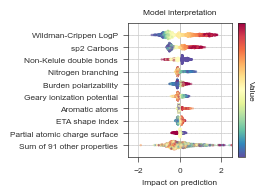

In [11]:
from __future__ import division

import warnings
import numpy as np
import scipy as sp
from scipy.stats import gaussian_kde
try:
    import matplotlib.pyplot as pl
except ImportError:
    warnings.warn("matplotlib could not be loaded!")
    pass
from shap.plots._labels import labels
from shap.plots import colors
from shap.utils import safe_isinstance, OpChain, format_value
from shap.plots._utils import convert_ordering, convert_color, merge_nodes, get_sort_order, sort_inds
from shap import Explanation
from stylia import TWO_COLUMNS_WIDTH
import stylia
import matplotlib.pyplot as plt

synonyms = {
    "SLogP": "Wildman-Crippen LogP",
    "C2SP2": "sp2 Carbons",
    "nBondsD": "Non-Kelule double bonds",
    "AMID_N": "Nitrogen branching",
    "BCUTp-1h": "Burden polarizability",
    "GATS1i": "Geary ionization potential",
    "nAromAtom": "Aromatic atoms",
    "ETA_dEpsilon_B": "ETA shape index",
    "PEOE_VSA12": "Partial atomic charge surface",
}

def beeswarm(shap_values, max_display=10, order=Explanation.abs.mean(0),
             clustering=None, cluster_threshold=0.5, color=None,
             axis_color="#333333", alpha=1, show=True, log_scale=False,
             color_bar=True, plot_size="auto", color_bar_label=labels["FEATURE_VALUE"]):

    if not isinstance(shap_values, Explanation):
        raise ValueError("the beeswarm plot requires Explanation object as the `shap_values` argument")

    shap_exp = shap_values
    # we make a copy here, because later there are places that might modify this array
    values = np.copy(shap_exp.values)
    features = shap_exp.data
    if sp.sparse.issparse(features):
        features = features.toarray()
    feature_names = shap_exp.feature_names
    # if out_names is None: # TODO: waiting for slicer support
    #     out_names = shap_exp.output_names

    order = convert_ordering(order, values)

    # default color:
    if color is None:
        if features is not None:
            color = colors.red_blue
        else:
            color = colors.blue_rgb
    color = convert_color(color)

    idx2cat = None
    # convert from a DataFrame or other types
    if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
        if feature_names is None:
            feature_names = features.columns
        # feature index to category flag
        idx2cat = features.dtypes.astype(str).isin(["object", "category"]).tolist()
        features = features.values
    elif isinstance(features, list):
        if feature_names is None:
            feature_names = features
        features = None
    elif (features is not None) and len(features.shape) == 1 and feature_names is None:
        feature_names = features
        features = None

    num_features = values.shape[1]

    if feature_names is None:
        feature_names = np.array([labels['FEATURE'] % str(i) for i in range(num_features)])

    if log_scale:
        pl.xscale('symlog')

    if clustering is None:
        partition_tree = getattr(shap_values, "clustering", None)
        if partition_tree is not None and partition_tree.var(0).sum() == 0:
            partition_tree = partition_tree[0]
        else:
            partition_tree = None
    elif clustering is False:
        partition_tree = None
    else:
        partition_tree = clustering
    
    if partition_tree is not None:
        assert partition_tree.shape[1] == 4, "The clustering provided by the Explanation object does not seem to be a partition tree (which is all shap.plots.bar supports)!"

    # determine how many top features we will plot
    if max_display is None:
        max_display = len(feature_names)
    num_features = min(max_display, len(feature_names))

    # iteratively merge nodes until we can cut off the smallest feature values to stay within
    # num_features without breaking a cluster tree
    orig_inds = [[i] for i in range(len(feature_names))]
    orig_values = values.copy()
    while True:
        feature_order = convert_ordering(order, Explanation(np.abs(values)))
        if partition_tree is not None:

            # compute the leaf order if we were to show (and so have the ordering respect) the whole partition tree
            clust_order = sort_inds(partition_tree, np.abs(values))

            # now relax the requirement to match the parition tree ordering for connections above cluster_threshold
            dist = scipy.spatial.distance.squareform(scipy.cluster.hierarchy.cophenet(partition_tree))
            feature_order = get_sort_order(dist, clust_order, cluster_threshold, feature_order)
        
            # if the last feature we can display is connected in a tree the next feature then we can't just cut
            # off the feature ordering, so we need to merge some tree nodes and then try again.
            if max_display < len(feature_order) and dist[feature_order[max_display-1],feature_order[max_display-2]] <= cluster_threshold:
                #values, partition_tree, orig_inds = merge_nodes(values, partition_tree, orig_inds)
                partition_tree, ind1, ind2 = merge_nodes(np.abs(values), partition_tree)
                for i in range(len(values)):
                    values[:,ind1] += values[:,ind2]
                    values = np.delete(values, ind2, 1)
                    orig_inds[ind1] += orig_inds[ind2]
                    del orig_inds[ind2]
            else:
                break
        else:
            break

    # here we build our feature names, accounting for the fact that some features might be merged together
    feature_inds = feature_order[:max_display]
    y_pos = np.arange(len(feature_inds), 0, -1)
    feature_names_new = []
    for pos,inds in enumerate(orig_inds):
        if len(inds) == 1:
            feature_names_new.append(feature_names[inds[0]])
        elif len(inds) <= 2:
            feature_names_new.append(" + ".join([feature_names[i] for i in inds]))
        else:
            max_ind = np.argmax(np.abs(orig_values).mean(0)[inds])
            feature_names_new.append(feature_names[inds[max_ind]] + " + %d other features" % (len(inds)-1))
    feature_names = feature_names_new

    # see how many individual (vs. grouped at the end) features we are plotting
    if num_features < len(values[0]):
        num_cut = np.sum([len(orig_inds[feature_order[i]]) for i in range(num_features-1, len(values[0]))])
        values[:,feature_order[num_features-1]] = np.sum([values[:,feature_order[i]] for i in range(num_features-1, len(values[0]))], 0)
    
    # build our y-tick labels
    yticklabels = [feature_names[i] for i in feature_inds]
    if num_features < len(values[0]):
        yticklabels[-1] = "Sum of %d other properties" % num_cut
    synonyms[yticklabels[-1]] = yticklabels[-1]
 
    yticklabels = [synonyms[l] for l in yticklabels]

    row_height = 0.4
    if plot_size == "auto":
        pl.gcf().set_size_inches(8, min(len(feature_order), max_display) * row_height + 1.5)
    elif type(plot_size) in (list, tuple):
        pl.gcf().set_size_inches(plot_size[0], plot_size[1])
    elif plot_size is not None:
        pl.gcf().set_size_inches(8, min(len(feature_order), max_display) * plot_size + 1.5)
    pl.axvline(x=0, color="#999999", zorder=-1)

    # make the beeswarm dots
    for pos, i in enumerate(reversed(feature_inds)):
        pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
        shaps = values[:, i]
        fvalues = None if features is None else features[:, i]
        inds = np.arange(len(shaps))
        np.random.shuffle(inds)
        if fvalues is not None:
            fvalues = fvalues[inds]
        shaps = shaps[inds]
        colored_feature = True
        try:
            if idx2cat is not None and idx2cat[i]: # check categorical feature
                colored_feature = False
            else:
                fvalues = np.array(fvalues, dtype=np.float64)  # make sure this can be numeric
        except:
            colored_feature = False
        N = len(shaps)
        # hspacing = (np.max(shaps) - np.min(shaps)) / 200
        # curr_bin = []
        nbins = 100
        quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
        inds = np.argsort(quant + np.random.randn(N) * 1e-6)
        layer = 0
        last_bin = -1
        ys = np.zeros(N)
        for ind in inds:
            if quant[ind] != last_bin:
                layer = 0
            ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
            layer += 1
            last_bin = quant[ind]
        ys *= 0.9 * (row_height / np.max(ys + 1))

        if safe_isinstance(color, "matplotlib.colors.Colormap") and features is not None and colored_feature:
            # trim the color range, but prevent the color range from collapsing
            vmin = np.nanpercentile(fvalues, 5)
            vmax = np.nanpercentile(fvalues, 95)
            if vmin == vmax:
                vmin = np.nanpercentile(fvalues, 1)
                vmax = np.nanpercentile(fvalues, 99)
                if vmin == vmax:
                    vmin = np.min(fvalues)
                    vmax = np.max(fvalues)
            if vmin > vmax: # fixes rare numerical precision issues
                vmin = vmax

            assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

            # plot the nan fvalues in the interaction feature as grey
            nan_mask = np.isnan(fvalues)
            pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,
                        vmax=vmax, s=3, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)

            # plot the non-nan fvalues colored by the trimmed feature value
            cvals = fvalues[np.invert(nan_mask)].astype(np.float64)
            cvals_imp = cvals.copy()
            cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
            cvals[cvals_imp > vmax] = vmax
            cvals[cvals_imp < vmin] = vmin
            pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                        cmap=color, vmin=vmin, vmax=vmax, s=3,
                        c=cvals, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)
        else:

            pl.scatter(shaps, pos + ys, s=3, alpha=alpha, linewidth=0, zorder=3,
                        color=color if colored_feature else "#777777", rasterized=len(shaps) > 500)


    # draw the color bar
    if safe_isinstance(color, "matplotlib.colors.Colormap") and color_bar and features is not None:
        import matplotlib.cm as cm
        m = cm.ScalarMappable(cmap=color)
        m.set_array([0, 1])
        cb = pl.colorbar(m, ticks=[0, 1], aspect=20)
        cb.set_ticklabels([labels['FEATURE_VALUE_LOW'], labels['FEATURE_VALUE_HIGH']])
        cb.set_ticklabels("")
        cb.set_label(color_bar_label, size=6, labelpad=1, rotation=270, va="center", ha="center")
        cb.ax.tick_params(labelsize=6, length=0)
        cb.set_alpha(1)

    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('left')
    pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
    pl.yticks(range(len(feature_inds)), reversed(yticklabels), fontsize=6)
    pl.gca().tick_params('y', width=0.5, which='major')
    pl.gca().tick_params('x', width=0.5, labelsize=6)
    pl.ylim(-1, len(feature_inds))
    pl.xlabel("Impact on prediction", fontsize=6)
    pl.grid()
    pl.tight_layout()
    ax = pl.gca()
    return ax
    
ax = beeswarm(shap_te, color=plt.get_cmap("Spectral_r"), plot_size=(TWO_COLUMNS_WIDTH/2.7,TWO_COLUMNS_WIDTH/4), alpha=0.5, color_bar_label="Value")
ax = stylia.figure.figure.stylize(ax)
ax.grid(lw=0.5)

ax.set_title("Model interpretation", fontsize=6)
ax.set_xlim(-2.5, 2.5)
stylia.label(ax, ylabel="", xlabel="Impact on prediction")

stylia.save_figure("../assets/Figure02_G.png")
stylia.save_figure("../assets/Figure02_G.pdf")

Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'col

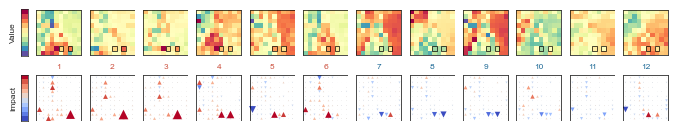

In [12]:
import stylia
from stylia import TWO_COLUMNS_WIDTH
from stylia import NamedColors

def grid_values_plot(ax, x, label=False):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x_ = x[i,j]
            c_ = cmap_data.transform([-x_])[0]
            r = Rectangle((i,j), 1, 1, color=c_, edgecolor="none", lw=0)
            ax.add_patch(r)
    ax.set_xlim(-0.1, x.shape[0]+0.1)
    ax.set_ylim(-0.1, x.shape[1]+0.1)
    ax.axes.set_axis_off()
    n = x.shape[0]
    ax.plot([0, n], [0,0], lw = 0.5, color="black")
    ax.plot([0, n], [n,n], lw = 0.5, color="black")
    ax.plot([0, 0], [0,n], lw = 0.5, color="black")
    ax.plot([n, n], [0,n], lw = 0.5, color="black")
    for l in ["SLogP", "C2SP2"]:
        i,j = name_grid[l]
        r = Rectangle((i,j), 1,1, facecolor="none", edgecolor="black", lw=0.5)
        ax.add_patch(r)
    

def grid_shap_plot(ax, x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x_ = x[i,j]
            c_ = cmap_shap.transform([x_])[0]
            if x_ >= 0:
                m = "^"
            else:
                m = "v"
            ax.scatter([i+0.5], [j+0.5], marker=m, color=c_, s=np.abs(x_)*30, zorder=2, lw=0)
    ax.set_xlim(-0.1, x.shape[0]+0.1)
    ax.set_ylim(-0.1, x.shape[1]+0.1)
    ax.axes.set_axis_off()
    n = x.shape[0]
    ax.plot([0, n], [0,0], lw = 0.5, color="black")
    ax.plot([0, n], [n,n], lw = 0.5, color="black")
    ax.plot([0, 0], [0,n], lw = 0.5, color="black")
    ax.plot([n, n], [0,n], lw = 0.5, color="black")

fig, axs = stylia.create_figure(nrows=2, ncols=13, width_ratios=[0.5] + [3]*12, width=TWO_COLUMNS_WIDTH*0.95, height=TWO_COLUMNS_WIDTH/5.6)
c = 0
ax = axs[c]
v = np.linspace(-3, 3, 10)
colors = cmap_data.transform(v)[::-1]
for i, c_ in enumerate(colors):
    r = Rectangle((0,i), 1, 1, edgecolor="none", facecolor=c_)
    ax.add_patch(r)
ax.set_xlim(0,1)
ax.set_ylim(0,len(colors))
ax.set_xticks([])
ax.set_yticks([])
stylia.label(ax, title="", ylabel="", xlabel="")
ax.text(-1, 5, "Value", rotation=90, va="center", ha="center", fontsize=6)
X_ = X[sel_idxs]
c += 1
for i in range(X_.shape[0]):
    if i == 0:
        label = True
    else:
        label = False
    ax = axs[c]
    grid_values_plot(ax, X_[i], label=label)
    stylia.label(ax, title="")
    c += 1
ax = axs[c]
v = np.linspace(-0.5, 0.5, 10)
colors = cmap_shap.transform(v)
for i, c_ in enumerate(colors):
    r = Rectangle((0,i), 1, 1, edgecolor="none", facecolor=c_)
    ax.add_patch(r)
ax.set_xlim(0,1)
ax.set_ylim(0,len(colors))
ax.set_xticks([])
ax.set_yticks([])
stylia.label(ax, title="", ylabel="", xlabel="")
ax.text(-1, 5, "Impact", rotation=90, va="center", ha="center", fontsize=6)
c += 1
S_ = S[sel_idxs]
for i in range(S_.shape[0]):
    ax = axs[c]
    grid_shap_plot(ax, S_[i])
    if i < 6:
        color = NamedColors().red
    else:
        color = NamedColors().blue
    if label:
        l = sel_fids[i]
    else:
        l = i+1
    ax.text(5, 12, l, va="center", ha="center", fontsize=6, color=color)
    c += 1
    stylia.label(ax, title="")

stylia.save_figure("../assets/Figure02_K.png")
stylia.save_figure("../assets/Figure02_K.pdf")

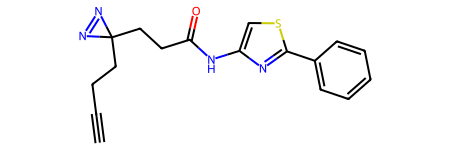

In [13]:
from rdkit import Chem

def show_molecule(fid):
    for k,v in smi2fid.items():
        if v == fid:
            mol = Chem.MolFromSmiles(k)
    return mol

show_molecule(sel_fids[0])

      promiscuity_fxp0_pxf0  promiscuity_fxp0_pxf1  promiscuity_fxp0_pxf2  \
1428                  0.781                  0.461                   0.14   

      promiscuity_fxp1_pxf0  promiscuity_fxp1_pxf1  promiscuity_fxp1_pxf2  \
1428                  0.943                  0.737                  0.238   

      promiscuity_fxp2_pxf0  promiscuity_fxp2_pxf1  promiscuity_fxp2_pxf2  
1428                  0.947                  0.754                  0.549  
      promiscuity_fxp0_pxf0  promiscuity_fxp0_pxf1  promiscuity_fxp0_pxf2  \
4750                  0.641                  0.614                  0.044   

      promiscuity_fxp1_pxf0  promiscuity_fxp1_pxf1  promiscuity_fxp1_pxf2  \
4750                   0.94                  0.692                  0.264   

      promiscuity_fxp2_pxf0  promiscuity_fxp2_pxf1  promiscuity_fxp2_pxf2  
4750                  0.934                  0.906                  0.429  
      promiscuity_fxp0_pxf0  promiscuity_fxp0_pxf1  promiscuity_fxp0_pxf2  \

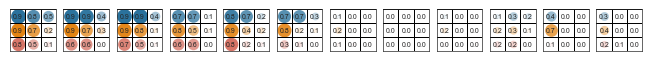

In [14]:
def promiscuity_levels_scores(ax, fid):
    columns = list(df.columns)[-10:-1]
    df_ = df[df["FragID"] == fid][columns]
    for scores in df_.values:
        pass
    
    print(df_)
    L = [["fxp0_pxf2", "fxp1_pxf2", "fxp2_pxf2"],
         ["fxp0_pxf1", "fxp1_pxf1", "fxp2_pxf1"],
         ["fxp0_pxf0", "fxp1_pxf0", "fxp2_pxf0"]]

    for idx, col in enumerate(columns):
        x = int(col.split("pxf")[1])
        y = int(col.split("fxp")[1].split("_")[0])
        v = scores[idx]
        if y == 0:
            color = NamedColors().red
        if y == 1:
            color = NamedColors().orange
        if y == 2:
            color = NamedColors().blue
        ax.scatter([x], [y], s=v*120, color=color, alpha=v, lw=0)
        ax.text(x, y, round(v,1), ha="center", va="center")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.set_xlim(-0.5, 2.5)
        ax.set_ylim(-0.5, 2.5)
        stylia.label(ax, xlabel="", ylabel="", title="")
        for i in range(3):
            ax.axvline(i+0.5, color="black", lw=0.5)
            ax.axhline(i+0.5, color="black", lw=0.5)

fig, axs = stylia.create_figure(1,12, width=TWO_COLUMNS_WIDTH*0.913, height=TWO_COLUMNS_WIDTH/10.6*0.85)
for sel_fid in sel_fids:
    ax = axs.next()
    promiscuity_levels_scores(ax, sel_fid)
plt.tight_layout()

stylia.save_figure("../assets/Figure02_J.png")
stylia.save_figure("../assets/Figure02_J.pdf")